# Advanced droughts workflow

Click [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/CLIMAAX/DROUGHTS/main?labpath=DROUGHTS_notebook_1.ipynb) to launch this workflow on MyBinder. 

# About droughts and droughts' risks

## What is a drought?

Simply stated, drought is ‘the extreme persistence of precipitation deficit over a specific region for a specific period of time’ $^1$. Droughts are often classified into three main types different by their severity, impacts, and time scales:

1. <ins>Meteorological drought</ins> is often caused by short-term precipitation deficiency and its impacts highly depend on its timing. For example, lack of rain during the sprouting phase in rain-fed agriculture could lead to crop failure. 
2. <ins>Agricultural drought</ins> is a medium-term phenomenon, characterized by reduced soil moisture content and is caused by a prolonged period of meterological drought. 
3. On the long-term, <ins>hydrological drought</ins> is characterized by lower stream flow, reduced water level in water bodies, and may affect groundwater storage. 

The cascade between drought types is goverened by the severity (i.e., magnitude), duration, and spatio-temporal distribution of drought events.

## What is drought risk?

Drought risk is a measure for quantifying the likelyhood of a meaningfull impact from drought-event(s)
on human population, its economic activity and assets, and the environment. The risk for an impact depends on the <ins>drought hazard</ins>, <ins>exposure</ins>, and the <ins>vulnerability</ins> to droughts. <ins>Hazard</ins> measures the magnitude, duration, and timing of drougt events. <ins>Exposure</ins> to droughts represent the spatial distribution of drought relative to distribution of potentially impactful systems, e.g., location of cultivated land, wetlands, etc. Finally, <ins>vulnerability</ins> stands for the level of impact expected for a given system during a given event, and is affected by the systems' intrinsic attributes. For example, fields with drought-resistent crops varities would be less vulnerable to droughts.


## How do we assess drought risk?

There are many different metrics to assess drought risk, which account for at least one of the risk factors: hazard, exposure and vulnerability.

This workflow quantifies drought risk as the product of drought hazard, exposure and vulnerability. The methodology used here was developed and applied globally by Carrão et al. (2016) $^2$. The result of this workflow is a risk map showing the relative drought risk of different spatial units (i.e., subnational administrative regions) from a larger region (i.e., the European Union). Regional drought risk scores are on a scale of 0 to 1, with 0 representing the lowest risk and 1 the highest. The workflows takes each risk determinant (i.e. hazard, exposure and vulnerability) and normalised it taking into account its maximum and minimum values across all sub-national administrative regions. Thus, the results of this drought risk workflow are relative to the sample of geographic regions used for normalisation. The proposed risk scale is not a measure of absolute losses or actual damage, but a relative comparison of drought risk between the input regions. Therefore, the resulting data and mapping can help users to assess in which sub-administrative units within a jurisdictions the drought risk is or will be higher, allowing for better resouce allocation and better coordination within and between different levels of government.

Below is a description of the data and tools used to calculate drought hazard, exposure and vulnerability, both for the historic period and for future scenarios, and the outputs of this workflow. 

For the future scenarios, we decided to follow the SSP-RCPs combinations as in the IPCC 6th assessment report (https://www.ipcc.ch/assessment-report/ar6/).

More expert users can find a more detailed and technical explanation on how hazard, exposure and vulnerability are quantified in the colored text boxes. 


## Datasets (historic and future projections)

In this workflow the following data is used:


#### Spatial units: 

We used GeoJSON maps of NUTS2 and NUTS3 regions to define the selected spacial units, which can be downloaded at this link https://gisco-services.ec.europa.eu/distribution/v2/nuts/geojson/


### Hazard data and methods:

Drought hazard (dH) for a given region is estimated as the probability of exceedance the median of regional (e.g., EU level) severe precipitation deficits for an historical reference period (e.g. 1979-2019) or for a future projection period (e.g. 2015-2100).

For estimating drought hazard, this workflows requires monthly total precipitation for each NUTS2 or NUTS3 region during the historical reference period or future projection period. Usually, these are observation-based or simulated time-series of gridded precipitation data. In the historic workflow, we used GSWP3 and W5E5 global meteorological forcing data processed for ISIMIP3a, sets on a 0.5°x0.5°C global grid and at daily time steps for the historical period of 1979-2019 (https://doi.org/10.48364/ISIMIP.982724.2). For the future projections, we used the ISIMIP3b bias-adjusted atmospheric climate input data, available for 5 CMIP6 global climate models (GFDL-ESM4, IPSL-CM6A-LR, MPI-ESM1-2-HR, MRI-ESM2-0, UKESM1-0-LL), and three SSP-RCPs combinations (SSP126, SSP370, SSP585) (https://doi.org/10.48364/ISIMIP.842396.1). There is no minimum requirement for the length of the precipitation record in this workflow, but as individual drought events can last for months or even years, we recommend that at least several decades are included.

Processing these data is performed by applying Geographic Information System (GIS) techniques, to extract an aggregated value (e.g., total precipitation) of the data points located within each area of interest (e.g., NUTS2 region). Zonal statistics is widely used for that purpose, and it was the method used in our data processing.

Point, observation-based datasets are an alternative data source, usually collected by meteorological station networks. One can choose the data collected in one or more (e.g., average) representative station per area of interest to construct a NUTS2 level dataset. 

Our workflow expects a table where each row represents the total precipitation in mm for a month/year combination, and each column represents an area of interest (e.g. NUTS2 region). The first column contains the date in this format YYYY-MM-DD. The **title of the first columns has to be 'timing' and the rest of the titles have to be the codes of the areas of interest (e.g. NUTS2), which have to be identical to the codes as they appear in the NUTS2 or NUTS3 spatial data from the [European Commission](https://ec.europa.eu/eurostat/en/web/nuts/background)**.

A pre-processed table with precipitation data for European countries at NUTS3 level is already provided, which can be fed directly into the workflow (see sample_data folder).

Precipitation data are then analysed by calculating precipitation deficit events for each region and measuring their severity using the weighted anomaly of standardised precipitation (WASP) index. The result is a list of drought events and their severity for each selected region (e.g. NUTS3 regions) for the reference period, which is then compared with the median of severe precipitation deficits for the same period for all regions considered (e.g. EU level) to calculate the probability (dH) of each region being affected by a drought event (i.e. exceeding the EU median of severe precipitation deficits). For more details on the how the WASP index is calculated see the colored box below.

<div class="alert alert-block alert-warning">
<b>Quantifying drought hazard</b> 
Drought hazard (dH) for a given region is estimated as the probability of exceedance the median of regional (e.g., EU level) severe precipitation deficits for an specified time reference period (historic or future).

A severe precipitation deficity is calculated using the weighted anomaly of standardized precipitation (WASP) index. This index accounts for precipitation seasonal patterns and is computed by summing weighted and standardized monthly precipitation anomalies $^3$.

We use the weighted anomaly of standardized precipitation (WASP) index to define the severity of precipitation deficit. The WASP-index takes into account the annual seasonality of precipitation cycle and is computed by summing weighted standardized monthly precipitation anomalies (see Eq. 1). Where $P_{n,m}$ is each region's monthly precipitation, $T_m$ is a monthly treshold defining precipitation severity, and $T_A$ is an annual threshold for precipitation severity. The thresholds are defined by dividing multi-annual monthly observed rain using the 'Fisher-jenks' classigication algorithm $^4$. 

Eq. 1: $$WASP_j = \Sigma_{P_{n,m} < T_m}^{P_{n,m} >= T_m}( \frac{P_{n,m} - T_m}{T_m})*\frac{T_m}{T_A}$$
</div>

# Workflow implementation

### Load libraries

In this notebook we will use the following Python libraries:
- [os](https://docs.python.org/3/library/os.html) - To create directories and work with files
- [urllib](https://docs.python.org/3/library/urllib.html) - To access to online resources
- [pandas](https://pandas.pydata.org/docs/user_guide/index.html) - To create and manage data frames (tables) in Python
- [geopandas](https://geopandas.org/en/stable/docs.html) - Extend pandas to store and manipulate spatial data
- [numpy](https://numpy.org/doc/stable/) - For basic math tools and operations
- [scipy](https://scipy.org/) - Provide advanced mathematical tools and optimization capacities 
- [jenkspy](https://github.com/mthh/jenkspy) - To apply Fisher-Jenks alogrithm 
- [json](https://docs.python.org/3/library/json.html) - To load, store and manipuilate JSON objects
- [pyproj](https://pyproj4.github.io/pyproj/stable/) - An interface to a geographic projections and transformations library
- [matplotlib](https://matplotlib.org/) - For plotting
- [plotly](https://plotly.com/python/) - For dynamic and interactive plotting
- [datetime](https://docs.python.org/3/library/datetime.html) - For handling dates in Python

In [1]:
# lOAD LIBRARIES
import os
import urllib
os.environ['USE_PYGEOS'] = '0'
import pandas as pd
import geopandas as gpd
import numpy as np
import scipy
import jenkspy
import json
import pyproj
import plotly.express as px
import matplotlib.pyplot as plt
from datetime import datetime

# READ SCRIPTS
# adapted from https://github.com/metjush/envelopment-py/tree/master used for DEA 
from envelopmentpy.envelopment import *

# Function for calculating drought hazard indices
%run DROUGHTS_functions.ipynb


### Define working environment and global parameters
This workflow relies on pre-proceessed data. The user will define the path to the data folder and the code below would create a folder for outputs.


In [98]:
# Set working environment

workflow_folder = './sample_data_nuts3/'

# debug if folder does not exist - issue an error to check path

# create outputs folder
if not os.path.exists(os.path.join(workflow_folder, 'outputs')):
    os.makedirs(os.path.join(workflow_folder, 'outputs'))

Load NUTS3 spatial data and define regions of interest

In [99]:
# load nuts3 spatial data
print('Load NUTS3 map')
json_nuts_path = 'https://gisco-services.ec.europa.eu/distribution/v2/nuts/geojson/NUTS_RG_01M_2021_4326_LEVL_3.geojson'
nuts = load_nuts_json(json_nuts_path)

# set country = 0 to map all Europe
#nuts['NUTS_ID2'] = nuts['NUTS_ID'].str.slice(0,4)

print("Choose country code from: ", nuts['CNTR_CODE'].unique())



Load NUTS3 map
Choose country code from:  ['HR' 'DE' 'BG' 'AT' 'AL' 'BE' 'ES' 'CH' 'CZ' 'EL' 'FR' 'FI' 'EE' 'DK'
 'CY' 'HU' 'NL' 'NO' 'LV' 'LT' 'IS' 'MK' 'MT' 'IT' 'TR' 'PL' 'RO' 'SE'
 'RS' 'PT' 'IE' 'UK' 'ME' 'LU' 'SK' 'SI' 'LI']


## Choose country code:

In [100]:
#select one country
ccode = "ES"

# validate country selection and subset regions
if not nuts['CNTR_CODE'].str.contains(ccode).any:
    print("Country code: ", ccode, " is not valid; please choose a valid country code.")
else:
    nuts = nuts.query('CNTR_CODE in @ccode')
  
    #print("List of nuts2: ", nuts['NUTS_ID2'].unique())

## Choose NUTS2 code:

In [101]:
# Use of regular expression is allowed:
    # For choosing a specific NUTS2, specify the unit code, e.g. rcode = 'EL61'
    # For choosing all units in a NUTS1 specify the NUTS1 code, e.g., rcode = 'EL6' (results: EL61 - EL65)
    # For choosing all units in a country specify the country code, e.g., rcode = 'EL' (for Greece)
#rcode = 'DE'

# validate country selection and subset regions
#if not nuts['NUTS_ID2'].str.contains(rcode).any:
#    print("NUTS2 code(s): ", rcode, " is(are) not valid; please choose a valid nuts2.")
#else:
#    nuts = nuts.query('NUTS_ID2.str.contains(@rcode)')
regions = nuts['NUTS_ID']
    
# prepare output table
output = pd.DataFrame(regions, columns = ['NUTS_ID'])
print("Selected regions extracted successfuly.")
print(nuts.head(10))

Selected regions extracted successfuly.
                                                                geometry  \
Location                                                                   
ES: Girona             MULTIPOLYGON (((3.17480 42.43538, 3.17524 42.4...   
ES: Mallorca           MULTIPOLYGON (((3.17671 39.95323, 3.17925 39.9...   
ES: Menorca            MULTIPOLYGON (((4.09361 40.06178, 4.10332 40.0...   
ES: Barcelona          MULTIPOLYGON (((2.77851 41.64881, 2.74792 41.6...   
ES: Badajoz            POLYGON ((-5.04700 38.72913, -5.06166 38.72437...   
ES: Valencia/València  MULTIPOLYGON (((-0.79764 39.88108, -0.79175 39...   
ES: Córdoba            MULTIPOLYGON (((-4.26889 38.34721, -4.26356 38...   
ES: Tarragona          MULTIPOLYGON (((1.64532 41.19562, 1.63160 41.1...   
ES: Alicante/Alacant   MULTIPOLYGON (((-0.03762 38.88641, -0.02303 38...   
ES: Cáceres            POLYGON ((-5.73760 40.29416, -5.69985 40.28942...   

                      NUTS_ID  LEVL_CODE CNTR_C

## Hazard workflow

### Loading precipitation data
Precipitation data is provided in the format required at the NUTS3 level for EU countries in the sample_data folder: file "drought_hazard.csv". See XX for details on how to prepare the input data for the hazard assessment.

In [102]:
# Load precipitation data
print("Analyzing drought hazard. This process may take few minutes...")
print('\n')
precip = pd.read_csv(os.path.join(workflow_folder, "nuts3_hazard.csv"))
# convert timing column to datetime
precip['timing'] = pd.to_datetime(precip['timing'], format = '%Y-%m-%d') 
#'%b-%Y'

Analyzing drought hazard. This process may take few minutes...




Subset columns based on the regions selected above. Each column of the input precipitation data represent a NUTS3 region.

In [103]:
# col_subset aims to extract the relevant results
col_subset = np.isin(precip.columns, regions)
col_subset[0] = True 
precip = precip.loc[:, col_subset]

# print head of the table
print('Input precipitation data (top 3 rows): ')
print(precip.head(3))

print('\n')

Input precipitation data (top 3 rows): 
      timing     ES111     ES112     ES113     ES114     ES120     ES130  \
0 1901-01-31  0.000441  0.000344  0.000280  0.000283  0.000416  0.000302   
1 1901-02-28  0.000339  0.000247  0.000215  0.000229  0.000377  0.000375   
2 1901-03-31  0.000376  0.000409  0.000494  0.000389  0.000531  0.000465   

      ES211     ES212     ES213  ...     ES425     ES431     ES432     ES511  \
0  0.000135  0.000143  0.000152  ...  0.000393  0.000706  0.000591  0.000044   
1  0.000176  0.000215  0.000224  ...  0.000362  0.000746  0.000610  0.000151   
2  0.000228  0.000282  0.000264  ...  0.000539  0.001327  0.001134  0.000217   

      ES512     ES513     ES514     ES521     ES522     ES523  
0  0.000080  0.000072  0.000112  0.000138  0.000193  0.000258  
1  0.000125  0.000104  0.000115  0.000325  0.000273  0.000454  
2  0.000281  0.000369  0.000086  0.000151  0.000096  0.000181  

[3 rows x 53 columns]




### Visualize precipitation data

In [116]:
df = precip
#if ccode is only for one region
df['Regional_mean']=df.drop('timing', axis=1).mean(axis=1) #create regional mean
print(df.head(3))


# print line chart
fig = px.line(df, x='timing', y=[(df.[:, df.columns.str.startswith('ES11')]), 'Regional_mean'], title='Precipitation in mm/month')
fig.show()


      timing     ES111     ES112     ES113     ES114     ES120     ES130  \
0 1901-01-31  0.000441  0.000344  0.000280  0.000283  0.000416  0.000302   
1 1901-02-28  0.000339  0.000247  0.000215  0.000229  0.000377  0.000375   
2 1901-03-31  0.000376  0.000409  0.000494  0.000389  0.000531  0.000465   

      ES211     ES212     ES213  ...     ES431     ES432     ES511     ES512  \
0  0.000135  0.000143  0.000152  ...  0.000706  0.000591  0.000044  0.000080   
1  0.000176  0.000215  0.000224  ...  0.000746  0.000610  0.000151  0.000125   
2  0.000228  0.000282  0.000264  ...  0.001327  0.001134  0.000217  0.000281   

      ES513     ES514     ES521     ES522     ES523  Regional_mean  
0  0.000072  0.000112  0.000138  0.000193  0.000258       0.000295  
1  0.000104  0.000115  0.000325  0.000273  0.000454       0.000307  
2  0.000369  0.000086  0.000151  0.000096  0.000181       0.000450  

[3 rows x 54 columns]


ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

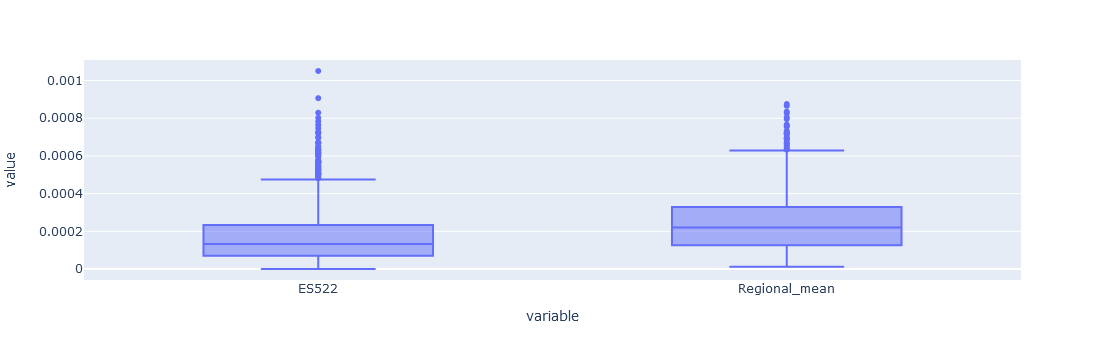

In [111]:
# print box plots
#select which regions to compare, or the calculated monthly regional mean

fig2 = px.box(df, y=['ES522', 'Regional_mean'])
fig2.show()


### Calculate WASP Index (Weighted Anomaly Standardized Precipitation) monthly threshold
For more details on the WASP index, see XX.

In [108]:
# create empty arrays and tables for intermediate and final results
WASP = []
WASP_global = []
drought_class = precip.copy()

# prepare output for drought event index - WASP_j- list of lists wasp = [[rid1], [rid2], ...]
for i in range(1, len(precip.drop(columns=precip.columns[0], axis=1).columns)):
    # For every NUTS3 out of all regions - do the following:
    
    # empty array for the monthly water deficit thresholds
    t_m = []
    for mon_ in range(1, 13):
        # For every month out of all all months (January, ..., December) - do the following:
        
        # calculcate monthly drought threshold -\
            # using a division of the data into to clusters with the Jenks' (Natural breaks) algorithm
        r_idx = precip.index[precip.timing.dt.month == mon_].tolist()
        t_m_last = jenkspy.jenks_breaks(precip.iloc[r_idx, i], n_classes = 2)[1]
        t_m.append(t_m_last)
        
        # Define every month with water deficity (precipitation < threshold) as a drought month
        drought_class.iloc[r_idx, i] = (drought_class.iloc[r_idx, i] < t_m_last).astype(int)

    # calculate annual water deficit threshold
    t_a = sum(t_m)
    
    # calculate droughts' magnitude and duration using the WASP indicator
    WASP_tmp = []
    first_true=0
    index = []
    for k in range(1, len(precip)):
        # for evary row (ordered month-year combinations):
            # check if droguht month -> calculate drought accumulated magnitude (over 1+ months)
        if drought_class.iloc[k, i]== 1:
            # In case of a drought month.
            # calculate monthly WASP index
            index = int(drought_class.timing.dt.month[k] - 1)
            # WASP monthly index: [(precipitation - month_threshold)/month_threshold)]*[month_threshold/annual_treshold]
            WASP_last=((precip.iloc[k,i] - t_m[index])/t_m[index])* (t_m[index]/t_a)
            
            if first_true==0:
                # if this is the first month in a drought event:
                # append calculated monthly wasp to WASP array.
                WASP_tmp.append(WASP_last)
                first_true=1
            else:
                # if this is NOT the first month in a drought event:
                # add the calculated monthly wasp to last element in the WASP array (accumulative drought).
                WASP_tmp[-1]=WASP_tmp[-1] + WASP_last
            WASP_global.append(WASP_last)
        else:
            # check if not drought month - do not calculate WASP
            first_true=0
    WASP.append(np.array(WASP_tmp))


TypeError: 'list' object is not callable

In [109]:
WASP = np.array(WASP, dtype=object)
s = []

for i in range(WASP.shape[0]):
    s.append(round(np.nansum(WASP[i]) / len(WASP[i]), 3))
    
print (s)

[]


### Calculate the exceedance probability from the median global WASP of each region as the Hazard index (dH)

In [ ]:
dH = []
WASP = np.array(WASP, dtype=object)

# calculate global median deficit severity - 
    # set drought hazard (dH) as the probability of exceeding the global median water deficit.

median_global_wasp = np.nanmedian(WASP_global)

# calculate dH per region i
for i in range(WASP.shape[0]):
    # The more negative the WASP index, the more severe is the deficit event, so 
    # probability of exceedence the severity is 1 - np.nansum(WASP[i] >= median_global_wasp) / len(WASP[i])
    dH.append(round(1 - np.nansum(WASP[i] >= median_global_wasp) / len(WASP[i]), 3))

output['hazard_raw'] = dH
print('>>>>> Drought hazard is completed.')

In [ ]:
# Set to print scatter plot to evaluate the DEA results against the maximum exposure/vulnerability.
# The DEA of a region should approximate, or to be higher from the maximum exposure/vulnerability factor. 
# Evaluation is more  meaningful in application for multiple coutnries.

evaluateDEA = True

### Load exposure data
Exposure indicators for EU countries at the NUTS3 level are provided in the sample_data folder (file : "drought_exposure.csv"). For more details on the indicators included see XX.

In [ ]:
print("Analyzing drought exposure. This process may take few minutes...")
print('\n')
exposure = pd.read_csv(os.path.join(workflow_folder, "nuts3_exposure.csv"))

# take out country statistics for stretching
# np.array (0: min, 1: max; NUTS_ID..+variables)
exposure = exposure.query('NUTS_ID.str.contains(@ccode)') # see how to use ^ to only use the beginning
cnt_range = pd.Series(index=['min','max'],data=[exposure.min(),exposure.max()]) 

exposure = exposure.query('NUTS_ID in @regions')

# Normalize the exposure using a min-max strech.
cols = exposure.columns[1:]

for varname in cols:
    # save maximum and minimum values
    mx_exposure = cnt_range[1][varname]#np.nanmax(exposure[varname])
    mn_exposure = cnt_range[0][varname]#np.nanmin(exposure[varname])
    
    # stretch values between 0 -1
    exposure.loc[:, varname] = np.maximum((exposure.loc[:, varname] - mn_exposure)/(mx_exposure - mn_exposure), 0.01)


# load exposure and sort to match nuts['NUTS_ID'] order
sorterIndex = dict(zip(nuts['NUTS_ID'], range(len(nuts['NUTS_ID']))))
exposure['sort_col'] = exposure['NUTS_ID'].map(sorterIndex)
exposure.sort_values(['sort_col'],
        ascending = [True], inplace = True)
exposure = exposure.drop(columns='sort_col')

# show data

print('Input exposure data (top 3 rows): ')
print(exposure.head(3))
print('\n')

### Calculate DEA and dE
Data Envelopment Analysis (DEA) is used to quantify the relative exposure of a region to drought (dE) from a multidimensional set of indicators.

In [ ]:
# set DEA(loud = True) to print optimization status/details
dea_e = DEA(np.array([1.] * len(regions)).reshape(len(regions),1),\
            exposure.to_numpy()[:,1:],\
         loud = False)  # we use a dummy factor for the input
dea_e.name_units(regions)

# returns a list with regional efficiencies
dE = dea_e.fit()
if evaluateDEA:
    dEmax = exposure.iloc[:,1:].max(axis = 1)
    print("plot max vs DEA:")
    fig = px.scatter(x=list(dEmax), y=dE,\
                     title = 'Evaluate exposure\'s DEA',\
                    labels={
                         "x": "Maximum exposure",
                         "y": "DEA"
                     })
    fig.show()
    
output['exposure_raw'] = dE
print('>>>>> Drought exposure is completed.')

 ## Vulnerability workflow

#### Load vulnerability data
Vulnerability indicators for EU countries at the NUTS3 level are provided in the sample_data folder (file : "drought_vulnerability.csv"). For more details on the indicators included see XX.

In [ ]:
print("Analyzing drought vulnerability. This process may take few minutes...")
print('\n')
vulnerability = pd.read_csv(os.path.join(workflow_folder, "nuts3_vulnerability.csv"))

# take out country statistics for stretching
# np.array (0: min, 1: max; NUTS_ID..+variables)
vulnerability = vulnerability.query('NUTS_ID.str.contains(@ccode)') # see how to use ^ to only use the beginning
cnt_range = pd.Series(index=['min','max'],data=[vulnerability.min(),vulnerability.max()]) 


vulnerability = vulnerability.query('NUTS_ID in @regions')


cols = vulnerability.columns[1:]

print("Define correlation's directions for the following indicators: ", list(cols))


In [ ]:

# Pre-define the correlation's direction between exposure and drought risk
# The example shows that: 
    # corellation of the rural population share with vulnerability is positive (True, below), i.e., 
     # rural regions are more vulneravle to droughts
    # correlation of the gdp/capitawith vulnerability is negative (False, below)
    
corelDirection = [True, False] 

# get vulnebrability factors, e.g., Social, Economic, Infrast
def sclt(x): 
    return(x[0])
factorsString = list(cols.str.split('_').map(sclt).drop_duplicates())

# Normalize the exposure using a min-max strech.


for varname in cols:
    # save maximum and minimum values
    mx_vulnerability = cnt_range[1][varname]#np.nanmax(vulnerability[varname])
    mn_vulnerability = cnt_range[0][varname]#np.nanmin(vulnerability[varname])

    # stretch values between 0 -1
    if corelDirection[list(cols.values).index(varname)]:
        # positive correlation between vulnerability indicator and vulnerability
        vulnerability.loc[:, varname] = np.maximum((vulnerability.loc[:, varname] - mn_vulnerability)/(mx_vulnerability - mn_vulnerability), 0.01)
    else:
        # negative correlation between vulnerability indicator and vulnerability
        vulnerability.loc[:, varname] = np.maximum(1 - (vulnerability.loc[:, varname] - mn_vulnerability)/(mx_vulnerability - mn_vulnerability), 0.01)
            

# load exposure and sort to match nuts['NUTS_ID'] order
sorterIndex = dict(zip(nuts['NUTS_ID'], range(len(nuts['NUTS_ID']))))
vulnerability['sort_col'] = vulnerability['NUTS_ID'].map(sorterIndex)
vulnerability.sort_values(['sort_col'],
        ascending = [True], inplace = True)
vulnerability = vulnerability.drop(columns='sort_col')

# filter the data based on the regions
row_subset = np.isin(vulnerability['NUTS_ID'], regions)
vulnerability = vulnerability.loc[row_subset, :]

#show the data
print('Input vulnerability data (top 3 rows): ')
print(vulnerability.head(3))

print('\n')

### Calculate the vulnerability index dV
More info

In [ ]:
#calculate dV
#this is done in a two step process including a DEA; for more info see XX
d_v = []   

for fac_ in factorsString:
    #for each factor category, i.e. economy, social or infrastructure, do the following:
    d_v_max = []
    print(">>>>> Analyzing the '" + fac_ + "' factors")
    #select the indicators for each factor category
    factor_subset = vulnerability.loc[:, vulnerability.columns.str.contains(fac_)]
    dea_v = DEA(np.array([1.] * len(regions)).reshape(len(regions),1),\
                factor_subset.to_numpy()[:, 1:],\
          loud = False)
    dea_v.name_units(regions)
    #d_v_max.append()
    d_v_last = dea_v.fit()  
    d_v.append(d_v_last)
    if evaluateDEA:
        dVmax = factor_subset.iloc[:,1:].max(axis = 1)
        print("plot max vs DEA:")
        fig = px.scatter(x=list(dVmax), y=d_v_last,\
                         title = 'Evaluate vulnerabiliy\'s DEA ({})'.format(fac_),\
                    labels={
                         "x": "Maximum vulnerabiliy",
                         "y": "DEA"
                     })
        fig.show()

# returns three lists with regional efficiencies for each factor
d_v = np.array(d_v).reshape(len(factorsString), len(regions))

#calculate dV
dV = np.nanmean(d_v, axis = 0)
output['vulnerability_raw'] = dV

print('>>>>> Drought vulnerability is completed.')

### Calculate the Risk Index for each region

In [ ]:
# Risk = Hazard * Exposure * Vulnerability

R = []

for i in range(0, len(regions)):
        R_last = round(dH[i] * dE[i] * dV[i], 3)
        R.append(R_last)

output['risk_raw'] = R

# categorized risk and merge results with the spatial data
 
output['risk_cat'] = [(int(np.ceil(x * 5))) for x in output['risk_raw']]
# keep index
nuts_idx = nuts.index
nuts = nuts.merge(output, on='NUTS_ID')
nuts = nuts.set_index(nuts_idx)

### Plot results

In [ ]:
print('\n')

print("NUTS2 with the highest drought risk (TOP 15): ")
print(pd.DataFrame(nuts.drop(columns='geometry')).sort_values(by=['risk_raw'],\
                      ascending = False)[['NUTS_ID', 'hazard_raw', 'exposure_raw',\
                                         'vulnerability_raw', 'risk_raw', 'risk_cat']].head(15))

print('\n')

# plot risk map

x_nuts, y_nuts = gpd.GeoSeries(nuts.geometry).unary_union.centroid.xy
fig = px.choropleth_mapbox(nuts, geojson=nuts.geometry, locations=nuts.index, color='risk_cat',\
                  color_continuous_scale="reds", range_color = [1,5], mapbox_style="open-street-map")

fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(title="Drought Risk",
                  mapbox_center = {"lat": list(y_nuts)[0], "lon": list(x_nuts)[0]},
                  mapbox_zoom=5,
                 coloraxis_colorbar=dict(
                    title= "Risk category",
                    tickvals = [1, 2, 3, 4, 5],
                    ticktext = [1, 2, 3, 4, 5]
                 ))

fig.show()


# plot risk components scatter plot
print('\n')
print('Explore drought risk dimensions (marker size indicates risk category): ')
print('Deselect specific countries by click on the country codes on the right.')
print('Select a specific country by double clicking on it.')
fig2 = px.scatter_3d(nuts, x='hazard_raw',\
                     y='exposure_raw',\
                     z='vulnerability_raw',\
                     size = 'risk_cat',\
                    color='CNTR_CODE') # nuts.index
fig2.update_layout(
    scene = dict(
        xaxis = dict(nticks=6, range=[0,1]),\
        xaxis_title = 'Hazard',\
        yaxis = dict(nticks=6, range=[0,1]),\
        yaxis_title = 'Exposure',\
        zaxis = dict(nticks=6, range=[0,1]),
        zaxis_title='Vulnerability',\
        aspectmode = "manual",
        aspectratio = dict(x = 0.9, y = 0.9, z = 0.9)),
    legend = dict(title = "Country code"),
    height = 700)

fig2.show()

print('\n')

output.to_csv(os.path.join(workflow_folder, 'outputs', 'droughtrisk_' + ccode + '.csv'))



## Conclusions

The above workflow estimates the relative drought risk of European NUTS2 regions as the product of drought hazard, exposure, and vulnerability. It results in relative drought risk classes ranging between 1 (low risk, 0 -0.2 risk) to 5 (high risk, 0.8 -1).
The European drought risk map shows hotspots with higher drought risk (class 2 -3) in Southern Spain, Northern France, Italy, Hungary, Serbia, and Romania. In the Northern parts of Europe, higher drought risk is shown in Poland, North Germany, Denmark, and parts of the Netherlands and Belgium.

Half of the NUTS2 units' hazard scores are high, ranging between 0.73 -0.8. The vulnerability is also relatively homogenous across the region, as half of the NUTS2 units range between 0.8 -0.88. The Balkan is the most vulnerable region having a minimum vulnerability score of 0.89. It means that the overall drought risk is limited mainly by exposure, which do not exceed 0.43 for 75% of the NUTS2 units.

A comparison with published literature$^2$ overall approves the current drought risk map. Although some discrepancies are evident, particularly in NUTS2 units in the Netherlands and Belgium, they may be associated with differences in precipitation data, temporal coverage, spatial resolution, and spatial coverage. Though different input data largely result in consistent drought hazard estimates, it may lead to local discrepancies in different regions (e.g., Central and Northern Europe)$^6$.

## Contributors
The workflow has beend developed by [Silvia Artuso](https://iiasa.ac.at/staff/silvia-artuso) and [Dor Fridman](https://iiasa.ac.at/staff/dor-fridman) from [IIASA's Water Security Research Group](https://iiasa.ac.at/programs/biodiversity-and-natural-resources-bnr/water-security), and supported by [Michaela Bachmann](https://iiasa.ac.at/staff/michaela-bachmann) from [IIASA's Systemic Risk and Reslience Research Group](https://iiasa.ac.at/programs/advancing-systems-analysis-asa/systemic-risk-and-resilience).

## References

[1] Zargar, A., Sadiq, R., Naser, B., & Khan, F. I. (2011). A review of drought indices. *Environmental Reviews*, 19: 333-349.

[2] Carrão, H., Naumann, G., & Barbosa, P. (2016). Mapping global patterns of drought risk: An empirical framework based on sub-national estimates of hazard, exposure and vulnerability. *Global Environmental Change*, 39, 108-124.

[3] Lyon, B., & Barnston, A. G. (2005). ENSO and the spatial extent of interannual precipitation extremes in tropical land areas. *Journal of climate*, 18(23), 5095-5109.

[4] Carrão, H., Singleton, A., Naumann, G., Barbosa, P., & Vogt, J. V. (2014). An optimized system for the classification of meteorological drought intensity with applications in drought frequency analysis. *Journal of Applied Meteorology and Climatology*, 53(8), 1943-1960.

[5] Sherman, H. D., & Zhu, J. (2006). Service productivity management: Improving service performance using data envelopment analysis (DEA). Springer science & business media.

[6] Carrão, H., Naumann, G. & Barbosa, P. (2018). Global projections of drought hazard in a warming climate: a prime for disaster risk management. *Clim Dyn* 50: 2137–2155.
